In [1001]:
import pandas as pd
from datetime import datetime
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

In [1002]:
## csv 파일로부터 재무제표 데이터를 불러옴
kosdaq1 = pd.read_csv("./공모전파일/코스닥데이터(연결재무제표).csv", encoding = "euc-kr")
kosdaq2 = pd.read_csv("./공모전파일/코스닥데이터(개별재무제표).csv", encoding = "euc-kr")
kosdaq1.columns = ["회사명", "거래소코드", "회계년도", "매출액증가율", "총자본증가율", "자기자본증가율", "순이익증가율", "유형자산증가율", "비유동자산증가율", "유동자산증가율", "재고자산증가율", "유동비율", "당좌비율", "현금비율", "순운전자본비율", "부채비율", "자기자본배율", "비유동비율", "유동자산구성비율", "자기자본구성비율", "매출액총이익률", "매출액순이익률", "총자본사업이익률", "총자본순이익률", "자기자본순이익률", "1주당순이익(원)", "1주당매출액(원)", "총자본회전률", "자기자본회전률", "비유동자산회전률", "재고자산회전률", "매출채권회전률", "매입채무회전률", "매입채무회전기간", "재고자산회전기간", "매출채권회전기간", "1회전기간", "운전가본회전률", "순운전자본회전률", "유형자산회전율", "유동자산회전률", "당좌자산회전률", "부가가치(백만원)", "총자본투자효율", "설비투자효율", "기계투자효율", "부가가치율", "노동소득분배율", "자본분배율", "이윤분배율", "상장폐지일", "소속코드", "상장일"]
kosdaq2.columns = ["회사명", "거래소코드", "회계년도", "매출액증가율", "총자본증가율", "자기자본증가율", "순이익증가율", "유형자산증가율", "비유동자산증가율", "유동자산증가율", "재고자산증가율", "유동비율", "당좌비율", "현금비율", "순운전자본비율", "부채비율", "자기자본배율", "비유동비율", "유동자산구성비율", "자기자본구성비율", "매출액총이익률", "매출액순이익률", "총자본사업이익률", "총자본순이익률", "자기자본순이익률", "1주당순이익(원)", "1주당매출액(원)", "총자본회전률", "자기자본회전률", "비유동자산회전률", "재고자산회전률", "매출채권회전률", "매입채무회전률", "매입채무회전기간", "재고자산회전기간", "매출채권회전기간", "1회전기간", "운전가본회전률", "순운전자본회전률", "유형자산회전율", "유동자산회전률", "당좌자산회전률", "부가가치(백만원)", "총자본투자효율", "설비투자효율", "기계투자효율", "부가가치율", "노동소득분배율", "자본분배율", "이윤분배율", "상장폐지일", "소속코드", "상장일"]
## 결측치를 개별재무제표로 대체함
kosdaq = kosdaq1.fillna(kosdaq2)
## 해당년도 재무제표가 존재하지 않는 기업 해당년도 삭제
# kosdaq.isna().sum()
kosdaq.dropna(subset=["매출액증가율"], inplace = True)
# kosdaq.isna().sum()
# 상장일 이전에 회계년도 데이터 삭제
kosdaq['상장일'] = pd.to_datetime(kosdaq['상장일'])
kosdaq['회계년도'] = pd.to_datetime(kosdaq['회계년도'], format='%Y/%m')
kosdaq = kosdaq.loc[kosdaq['회계년도'] >= kosdaq['상장일']]
## kosdaq 외국계 기업 종목코드 제거
kosdaq = kosdaq[kosdaq['거래소코드'] < 900000]
## 2. 거래소코드 2개인 기업들 셀렉
# grouped = kosdaq.groupby('회사명')['거래소코드'].nunique()
# result = grouped[grouped > 1].index.tolist()
# print(result)
## 거래소코드 2개인 기업 확인하여 삭제
codes = [271400, 60540, 262760, 278380, 131390, 230400, 284610, 176560, 284420, 251960, 216280,25440, 229480]
kosdaq = kosdaq.loc[~(kosdaq['거래소코드'].isin(codes))]
## 증가율 0 인 데이터 평균값으로 대체
kosdaq['자기자본증가율'] = kosdaq['자기자본증가율'].replace(0, np.nan)
mean_growth_rate = kosdaq['자기자본증가율'].mean()
kosdaq['자기자본증가율'] = kosdaq['자기자본증가율'].fillna(mean_growth_rate)
kosdaq['순이익증가율'] = kosdaq['순이익증가율'].replace(0, np.nan)
mean_growth_rate = kosdaq['순이익증가율'].mean()
kosdaq['순이익증가율'] = kosdaq['순이익증가율'].fillna(mean_growth_rate)
kosdaq['매출액증가율'] = kosdaq['매출액증가율'].replace(0, np.nan)
mean_growth_rate = kosdaq['매출액증가율'].mean()
kosdaq['매출액증가율'] = kosdaq['매출액증가율'].fillna(mean_growth_rate)
kosdaq['총자본증가율'] = kosdaq['총자본증가율'].replace(0, np.nan)
mean_growth_rate = kosdaq['총자본증가율'].mean()
kosdaq['총자본증가율'] = kosdaq['총자본증가율'].fillna(mean_growth_rate)
kosdaq['유형자산증가율'] = kosdaq['유형자산증가율'].replace(0, np.nan)
mean_growth_rate = kosdaq['유형자산증가율'].mean()
kosdaq['유형자산증가율'] = kosdaq['유형자산증가율'].fillna(mean_growth_rate)
kosdaq['비유동자산증가율'] = kosdaq['비유동자산증가율'].replace(0, np.nan)
mean_growth_rate = kosdaq['비유동자산증가율'].mean()
kosdaq['비유동자산증가율'] = kosdaq['비유동자산증가율'].fillna(mean_growth_rate)
kosdaq['유동자산증가율'] = kosdaq['유동자산증가율'].replace(0, np.nan)
mean_growth_rate = kosdaq['유동자산증가율'].mean()
kosdaq['유동자산증가율'] = kosdaq['유동자산증가율'].fillna(mean_growth_rate)
kosdaq['재고자산증가율'] = kosdaq['재고자산증가율'].replace(0, np.nan)
mean_growth_rate = kosdaq['재고자산증가율'].mean()
kosdaq['재고자산증가율'] = kosdaq['재고자산증가율'].fillna(mean_growth_rate)
kosdaq = kosdaq.astype({"거래소코드" : "str"})
kosdaq = kosdaq.astype({"소속코드" : "str"})
kosdaq

,회사명,거래소코드,회계년도,매출액증가율,총자본증가율,자기자본증가율,순이익증가율,유형자산증가율,비유동자산증가율,유동자산증가율,...,총자본투자효율,설비투자효율,기계투자효율,부가가치율,노동소득분배율,자본분배율,이윤분배율,상장폐지일,소속코드,상장일
0,(주)CMG제약,58820,2018-12-01,20.05,4.39,6.16,113.940000,6.71,16.47,0.18,...,14.73,106.25,478.91,33.79,67.33,32.67,36.00,NaN,5,2001-08-31
1,(주)CMG제약,58820,2019-12-01,17.56,68.07,73.26,-49.690000,39.67,26.20,85.06,...,9.90,114.60,438.05,32.47,72.60,27.40,16.03,NaN,5,2001-08-31
2,(주)CMG제약,58820,2020-12-01,9.96,1.62,0.54,-92.950000,23.31,18.52,-3.06,...,8.71,108.22,475.13,26.40,86.14,13.86,1.26,NaN,5,2001-08-31
3,(주)CMG제약,58820,2021-12-01,7.78,1.95,1.97,1372.340000,2.61,49.25,-14.04,...,9.69,126.93,601.75,27.77,77.39,22.61,16.41,NaN,5,2001-08-31
4,(주)CMG제약,58820,2022-12-01,18.31,7.07,0.14,60.737581,22.79,6.10,7.64,...,7.47,106.98,537.68,19.38,104.24,-4.24,-2.44,NaN,5,2001-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,흥구석유(주),24060,2018-12-01,6.87,-5.89,0.99,14.780000,-0.36,-2.09,-21.19,...,9.80,19.56,3064.10,4.44,47.47,52.53,32.14,NaN,5,1994-12-07
7654,흥구석유(주),24060,2019-12-01,-9.35,11.24,9.31,249.940000,-7.00,-2.63,80.74,...,18.02,42.99,3489.21,10.00,22.19,77.81,55.02,NaN,5,1994-12-07
7655,흥구석유(주),24060,2020-12-01,-23.78,0.07,3.38,-42.220000,-13.92,-8.21,22.41,...,12.27,34.04,3280.80,8.94,30.41,69.59,46.65,NaN,5,1994-12-07
7656,흥구석유(주),24060,2021-12-01,15.12,-1.28,-0.88,-70.810000,0.63,0.18,-4.24,...,7.01,19.15,1308.44,4.38,53.22,46.78,24.13,NaN,5,1994-12-07


In [1003]:
kospi1 = pd.read_csv("./공모전파일/코스피데이터(연결재무제표).csv", encoding = "euc-kr")
kospi2 = pd.read_csv("./공모전파일/코스피데이터(개별재무제표).csv", encoding = "euc-kr")
kospi1.columns = ["회사명", "거래소코드", "회계년도", "매출액증가율", "총자본증가율", "자기자본증가율", "순이익증가율", "유형자산증가율", "비유동자산증가율", "유동자산증가율", "재고자산증가율", "유동비율", "당좌비율", "현금비율", "순운전자본비율", "부채비율", "자기자본배율", "비유동비율", "유동자산구성비율", "자기자본구성비율", "매출액총이익률", "매출액순이익률", "총자본사업이익률", "총자본순이익률", "자기자본순이익률", "1주당순이익(원)", "1주당매출액(원)", "총자본회전률", "자기자본회전률", "비유동자산회전률", "재고자산회전률", "매출채권회전률", "매입채무회전률", "매입채무회전기간", "재고자산회전기간", "매출채권회전기간", "1회전기간", "운전가본회전률", "순운전자본회전률", "유형자산회전율", "유동자산회전률", "당좌자산회전률", "부가가치(백만원)", "총자본투자효율", "설비투자효율", "기계투자효율", "부가가치율", "노동소득분배율", "자본분배율", "이윤분배율", "상장폐지일", "소속코드", "상장일"]
kospi2.columns = ["회사명", "거래소코드", "회계년도", "매출액증가율", "총자본증가율", "자기자본증가율", "순이익증가율", "유형자산증가율", "비유동자산증가율", "유동자산증가율", "재고자산증가율", "유동비율", "당좌비율", "현금비율", "순운전자본비율", "부채비율", "자기자본배율", "비유동비율", "유동자산구성비율", "자기자본구성비율", "매출액총이익률", "매출액순이익률", "총자본사업이익률", "총자본순이익률", "자기자본순이익률", "1주당순이익(원)", "1주당매출액(원)", "총자본회전률", "자기자본회전률", "비유동자산회전률", "재고자산회전률", "매출채권회전률", "매입채무회전률", "매입채무회전기간", "재고자산회전기간", "매출채권회전기간", "1회전기간", "운전가본회전률", "순운전자본회전률", "유형자산회전율", "유동자산회전률", "당좌자산회전률", "부가가치(백만원)", "총자본투자효율", "설비투자효율", "기계투자효율", "부가가치율", "노동소득분배율", "자본분배율", "이윤분배율", "상장폐지일", "소속코드", "상장일"]
kospi = kospi1.fillna(kospi2)
kospi.dropna(subset=["매출액증가율"], inplace = True)
kospi['상장일'] = pd.to_datetime(kospi['상장일'])
kospi['회계년도'] = pd.to_datetime(kospi['회계년도'], format='%Y/%m')
kospi = kospi.loc[kospi['회계년도'] >= kospi['상장일']]
kospi = kospi[kospi['거래소코드'] < 900000]
kospi['자기자본증가율'] = kospi['자기자본증가율'].replace(0, np.nan)
mean_growth_rate = kospi['자기자본증가율'].mean()
kospi['자기자본증가율'] = kospi['자기자본증가율'].fillna(mean_growth_rate)
kospi['순이익증가율'] = kospi['순이익증가율'].replace(0, np.nan)
mean_growth_rate = kospi['순이익증가율'].mean()
kospi['순이익증가율'] = kospi['순이익증가율'].fillna(mean_growth_rate)
kospi['유동자산증가율'] = kospi['유동자산증가율'].replace(0, np.nan)
mean_growth_rate = kospi['유동자산증가율'].mean()
kospi['유동자산증가율'] = kospi['유동자산증가율'].fillna(mean_growth_rate)
kospi['재고자산증가율'] = kospi['재고자산증가율'].replace(0, np.nan)
mean_growth_rate = kospi['재고자산증가율'].mean()
kospi['재고자산증가율'] = kospi['재고자산증가율'].fillna(mean_growth_rate)
kospi['유형자산증가율'] = kospi['유형자산증가율'].replace(0, np.nan)
mean_growth_rate = kospi['유형자산증가율'].mean()
kospi['유형자산증가율'] = kospi['유형자산증가율'].fillna(mean_growth_rate)
kospi['비유동자산증가율'] = kospi['비유동자산증가율'].replace(0, np.nan)
mean_growth_rate = kospi['비유동자산증가율'].mean()
kospi['비유동자산증가율'] = kospi['비유동자산증가율'].fillna(mean_growth_rate)
kospi['매출액증가율'] = kospi['매출액증가율'].replace(0, np.nan)
mean_growth_rate = kospi['매출액증가율'].mean()
kospi['매출액증가율'] = kospi['매출액증가율'].fillna(mean_growth_rate)
kospi['총자본증가율'] = kospi['총자본증가율'].replace(0, np.nan)
mean_growth_rate = kospi['총자본증가율'].mean()
kospi['총자본증가율'] = kospi['총자본증가율'].fillna(mean_growth_rate)
kospi = kospi.astype({"거래소코드" : "str"})
kospi = kospi.astype({"소속코드" : "str"})
kospi

,회사명,거래소코드,회계년도,매출액증가율,총자본증가율,자기자본증가율,순이익증가율,유형자산증가율,비유동자산증가율,유동자산증가율,...,총자본투자효율,설비투자효율,기계투자효율,부가가치율,노동소득분배율,자본분배율,이윤분배율,상장폐지일,소속코드,상장일
0,(주)DB하이텍,990,2018-12-01,-1.54,7.30,22.510000,-21.190000,7.56,6.69,8.40,...,28.98,61.13,1.409500e+02,46.18,42.92,57.08,28.09,NaN,1,1975-12-12
1,(주)DB하이텍,990,2019-12-01,20.64,2.10,15.450000,20.510000,3.18,-3.00,11.19,...,34.83,67.30,1.352100e+02,46.97,38.21,61.79,27.59,NaN,1,1975-12-12
2,(주)DB하이텍,990,2020-12-01,15.92,8.24,23.260000,58.670000,9.42,8.56,7.73,...,41.06,83.62,1.773200e+02,51.71,32.58,67.42,34.31,NaN,1,1975-12-12
3,(주)DB하이텍,990,2021-12-01,29.78,31.51,39.200000,90.870000,-2.50,2.14,77.51,...,48.06,134.52,2.847200e+02,61.33,24.03,75.97,42.54,NaN,1,1975-12-12
4,(주)DB하이텍,990,2022-12-01,37.92,36.95,48.120000,76.350000,12.18,8.19,62.88,...,50.35,189.56,3.855200e+02,63.80,20.01,79.99,52.29,NaN,1,1975-12-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3688,흥아해운(주),3280,2018-12-01,-9.87,-5.33,-37.420000,273.538166,-12.07,-5.17,-6.33,...,4.24,6.91,1.135163e+09,4.52,201.90,-101.90,-254.12,NaN,1,1976-06-29
3689,흥아해운(주),3280,2019-12-01,-86.45,-46.38,-57.730000,273.538166,-51.51,-51.51,-13.42,...,3.10,5.59,4.455416e+08,13.08,241.39,-141.39,-384.23,NaN,1,1976-06-29
3690,흥아해운(주),3280,2020-12-01,-12.95,-33.46,-185.010000,273.538166,-24.76,-32.47,-37.01,...,-0.39,-0.62,0.000000e+00,-1.25,0.00,0.00,0.00,NaN,1,1976-06-29
3691,흥아해운(주),3280,2021-12-01,-8.11,-13.77,13.275779,273.538166,-20.91,-15.66,-6.48,...,22.88,39.81,0.000000e+00,69.25,41.38,58.62,29.04,NaN,1,1976-06-29


In [1004]:
# 윈저라이징으로 양쪽 이상치 처리
kospi['매출액증가율']

q5 = np.percentile(kospi['매출액증가율'], 5)
q95 = np.percentile(kospi['매출액증가율'], 95)

outliers = kospi['매출액증가율'][(kospi['매출액증가율'] < q5) | (kospi['매출액증가율'] > q95)]

print("하위 5%:", q5)
print("상위 5%:", q95)
print("이상치 :", outliers)

하위 5%: -23.244
상위 5%: 48.906
이상치 : 5       -30.76
16      -23.28
17      -33.56
18       49.39
23       67.55
         ...  
3679     78.12
3681     66.54
3684     62.30
3689    -86.45
3692    117.63
Name: 매출액증가율, Length: 360, dtype: float64


In [1005]:
# 윈저라이징 함수 만들기
def windsorize(data, lower_percentile=0.05, upper_percentile=0.95):
    if isinstance(data, pd.Series):
        data = pd.DataFrame(data)
    numeric_df1 = data.select_dtypes(include=np.number)
    lower_bound = np.percentile(numeric_df1, lower_percentile * 100)
    upper_bound = np.percentile(numeric_df1, upper_percentile * 100)
    windsorized_data = np.where(numeric_df1 < lower_bound, lower_bound, numeric_df1)
    windsorized_data = np.where(windsorized_data > upper_bound, upper_bound, windsorized_data)
    return windsorized_data

In [1006]:
for i in range(3, 50, 1):
    kospi[kospi.columns[i]] = windsorize(kospi[kospi.columns[i]])

In [1007]:
# 전후 비교
kospi['매출액증가율']

q5 = np.percentile(kospi['매출액증가율'], 5)
q95 = np.percentile(kospi['매출액증가율'], 95)

outliers = kospi['매출액증가율'][(kospi['매출액증가율'] < q5) | (kospi['매출액증가율'] > q95)]

print("하위 5%:", q5)
print("상위 5%:", q95)
print("이상치:", outliers)

하위 5%: -23.2224
상위 5%: 48.9036
이상치: 5      -23.244
16     -23.244
17     -23.244
18      48.906
23      48.906
         ...  
3679    48.906
3681    48.906
3684    48.906
3689   -23.244
3692    48.906
Name: 매출액증가율, Length: 360, dtype: float64


In [1008]:
# standard 스케일링 툴 
!pip install scikit-learn

In [1009]:
# standard 스케일링
from sklearn.preprocessing import StandardScaler

numeric_cols = kospi.select_dtypes(include=np.number).columns
scaler = StandardScaler()
kospi[numeric_cols] = scaler.fit_transform(kospi[numeric_cols])

print(kospi.head())

        회사명 거래소코드       회계년도    매출액증가율    총자본증가율   자기자본증가율    순이익증가율   
0  (주)DB하이텍   990 2018-12-01 -0.545082  0.029407  1.056604 -0.950430  \
1  (주)DB하이텍   990 2019-12-01  0.696357 -0.393348  0.580566 -0.662053   
2  (주)DB하이텍   990 2020-12-01  0.432174  0.105828  1.107175 -0.398156   
3  (주)DB하이텍   990 2021-12-01  1.207933  1.997657  2.181970 -0.175476   
4  (주)DB하이텍   990 2022-12-01  1.663538  2.439924  2.677024 -0.275890   

    유형자산증가율  비유동자산증가율   유동자산증가율  ...   총자본투자효율    설비투자효율    기계투자효율     부가가치율   
0  0.106446 -0.064104 -0.024497  ...  1.229743 -0.307570 -0.359919  1.901851  \
1 -0.150118 -0.690984  0.115852  ...  1.846057 -0.249279 -0.360986  1.964812   
2  0.215398  0.056872 -0.058201  ...  2.180658 -0.095095 -0.353156  2.255392   
3 -0.482831 -0.358459  2.395941  ...  2.180658  0.385785 -0.333188  2.255392   
4  0.377069  0.032936  2.395941  ...  2.180658  0.905778 -0.314447  2.255392   

    노동소득분배율     자본분배율     이윤분배율  상장폐지일  소속코드        상장일  
0 -0.514174  0.743839  0.629

In [1010]:
# 체크하는 법
kospi[numeric_cols].mean()

매출액증가율      -4.751470e-17
총자본증가율       6.335293e-17
자기자본증가율     -4.380261e-17
순이익증가율      -1.049283e-16
유형자산증가율     -1.583823e-17
비유동자산증가율    -4.949448e-17
유동자산증가율      7.919117e-18
재고자산증가율     -1.484834e-17
유동비율         1.979779e-17
당좌비율        -1.385845e-16
현금비율        -1.326452e-16
순운전자본비율      1.108676e-16
부채비율        -5.741360e-17
자기자본배율       4.355514e-17
비유동비율        1.583823e-16
유동자산구성비율    -1.544228e-16
자기자본구성비율     3.642794e-16
매출액총이익률      3.088455e-16
매출액순이익률      7.919117e-18
총자본사업이익률    -4.751470e-17
총자본순이익률     -3.761580e-17
자기자본순이익률     0.000000e+00
1주당순이익(원)   -1.069081e-16
1주당매출액(원)   -7.523161e-17
총자본회전률      -1.682812e-17
자기자본회전률      1.880790e-16
비유동자산회전률     1.583823e-17
재고자산회전률      7.127205e-17
매출채권회전률     -7.919117e-18
매입채무회전률     -4.751470e-17
매입채무회전기간    -7.919117e-18
재고자산회전기간     2.049071e-16
매출채권회전기간    -3.009264e-16
1회전기간        4.355514e-17
운전가본회전률     -7.523161e-17
순운전자본회전률     4.355514e-16
유형자산회전율      9.106984e-17
유동자산회전률     -1.445239e-16
당좌자산회전률     

In [1011]:
kospi[numeric_cols].std()

매출액증가율       1.000139
총자본증가율       1.000139
자기자본증가율      1.000139
순이익증가율       1.000139
유형자산증가율      1.000139
비유동자산증가율     1.000139
유동자산증가율      1.000139
재고자산증가율      1.000139
유동비율         1.000139
당좌비율         1.000139
현금비율         1.000139
순운전자본비율      1.000139
부채비율         1.000139
자기자본배율       1.000139
비유동비율        1.000139
유동자산구성비율     1.000139
자기자본구성비율     1.000139
매출액총이익률      1.000139
매출액순이익률      1.000139
총자본사업이익률     1.000139
총자본순이익률      1.000139
자기자본순이익률     1.000139
1주당순이익(원)    1.000139
1주당매출액(원)    1.000139
총자본회전률       1.000139
자기자본회전률      1.000139
비유동자산회전률     1.000139
재고자산회전률      1.000139
매출채권회전률      1.000139
매입채무회전률      1.000139
매입채무회전기간     1.000139
재고자산회전기간     1.000139
매출채권회전기간     1.000139
1회전기간        1.000139
운전가본회전률      1.000139
순운전자본회전률     1.000139
유형자산회전율      1.000139
유동자산회전률      1.000139
당좌자산회전률      1.000139
부가가치(백만원)    1.000139
총자본투자효율      1.000139
설비투자효율       1.000139
기계투자효율       1.000139
부가가치율        1.000139
노동소득분배율      1.000139
자본분배율     

In [1012]:
kospi_sp = kospi.loc[~(kospi["상장폐지일"].isna())]

In [1013]:
kospi_sp["회사명"].unique()

array(['(주)동성화학', '(주)부산도시가스', '(주)사조해표', '(주)신한', '(주)엔에스쇼핑',
       '(주)폴루스바이오팜', '(주)한화갤러리아타임월드', '고려개발(주)', '두산건설(주)', '롯데푸드(주)',
       '알보젠코리아(주)', '에스비에스미디어홀딩스(주)', '웅진에너지(주)', '코리아오토글라스(주)',
       '코오롱머티리얼(주)', '한국제지(주)'], dtype=object)

In [1014]:
kosdaq_sp = kosdaq.loc[~(kosdaq["상장폐지일"].isna())]

In [1015]:
kosdaq_sp["회사명"].unique()

array(['(주)금빛', '(주)녹십자셀', '(주)뉴로스', '(주)데코앤이', '(주)드림티엔터테인먼트', '(주)레드로버',
       '(주)맘스터치앤컴퍼니', '(주)맥스로텍', '(주)모다', '(주)미래SCI', '(주)미래테크놀로지',
       '(주)바이오빌', '(주)세영디앤씨', '(주)소리바다', '(주)썬테크놀로지스', '(주)씨엠에스에듀',
       '(주)아이엠텍', '(주)에스마크', '(주)에스에이티', '(주)에스에프씨', '(주)에스제이케이',
       '(주)에이치디', '(주)에이팸', '(주)에프티이앤이', '(주)엘엑스세미콘', '(주)엘피케이로보틱스',
       '(주)엠씨넥스', '(주)연이비앤티', '(주)원익피앤이', '(주)이매진아시아', '(주)이십일스토어',
       '(주)이엠네트웍스', '(주)인터파크', '(주)제낙스', '(주)제이콘텐트리', '(주)제이테크놀로지',
       '(주)지에스홈쇼핑', '(주)지유온', '(주)카이노스메드', '(주)켐온', '(주)코너스톤네트웍스',
       '(주)코리아센터', '(주)쿠첸', '(주)티씨엠생명과학', '(주)티에스트릴리온', '(주)파인넥스',
       '(주)파티게임즈', '(주)팍스넷', '(주)포스코케미칼', '(주)포인트엔지니어링', '(주)폭스소프트',
       '(주)퓨전', '(주)피앤텔', '(주)한국비엔씨', '(주)한국아트라스비엑스', '(주)한컴지엠디', '(주)한프',
       '(주)행남사', '(주)화신테크', '(주)화진', '넥슨지티(주)', '다이노나(주)', '디에스티(주)',
       '럭슬(주)', '미래오토스', '에스에이치엔엘(주)', '에스지에이클라우드서비스(주)', '에스케이 머티리얼즈(주)',
       '에스케이씨솔믹스(주)', '에이아이비트(주)', '원텍(주)', '이엘케이(주)', '자안바이오(주)',
       '지스마트글로벌(주)', '참존글로벌(

In [1016]:
# # 20180101 ~ 20221231 상장폐지종목 데이터
# sp = pd.read_excel("./상장폐지기업.xlsx")
# cond = (sp["증권구분"] == "주권") & (sp["주식종류"] == "보통주") & (sp['시장구분'] != 'KONEX')
# sp = sp[cond]
# sp = sp.drop('번호', axis=1)
# sp.to_excel("delist.xlsx")

In [1017]:
# sp.loc[sp['종목명'].isin(['동성화학', '부산도시가스', '사조해표', '신한', '엔에스쇼핑',
#        '폴루스바이오팜', '한화갤러리아타임월드', '고려개발', '두산건설', '롯데푸드',
#        '알보젠코리아', '에스비에스미디어홀딩스', '웅진에너지', '코리아오토글라스',
#        '코오롱머티리얼', '한국제지', 'SBS미디어홀딩스', '부산가스'])]

In [1018]:
kospi_bs = kospi.loc[kospi['회사명'].isin(['(주)동성화학', '(주)사조해표', '(주)신한', '(주)폴루스바이오팜', '고려개발(주)', '롯데푸드(주)', '에스비에스미디어홀딩스(주)', '웅진에너지(주)', '코리아오토글라스(주)', '한국제지(주)'])]

In [1019]:
kospi_js = kospi.loc[~kospi['회사명'].isin(['(주)동성화학', '(주)사조해표', '(주)신한', '(주)폴루스바이오팜', '고려개발(주)', '롯데푸드(주)', '에스비에스미디어홀딩스(주)', '웅진에너지(주)', '코리아오토글라스(주)', '한국제지(주)'])]

In [1020]:
# sp.loc[sp['종목명'].isin(['금빛', '녹십자셀', '뉴로스', '데코앤이', '드림티엔터테인먼트', '레드로버',
#        '맘스터치앤컴퍼니', '맥스로텍', '모다', '미래SCI', '미래테크놀로지',
#        '바이오빌', '세영디앤씨', '소리바다', '썬테크놀로지스', '씨엠에스에듀',
#        '아이엠텍', '에스마크', '에스에이티', '에스에프씨', '에스제이케이',
#        '에이치디', '에이팸', '에프티이앤이', '엘엑스세미콘', '엘피케이로보틱스',
#        '엠씨넥스', '연이비앤티', '원익피앤이', '이매진아시아', '이십일스토어',
#        '이엠네트웍스', '인터파크', '제낙스', '제이콘텐트리', '제이테크놀로지',
#        '지에스홈쇼핑', '지유온', '카이노스메드', '켐온', '코너스톤네트웍스',
#        '코리아센터', '쿠첸', '티씨엠생명과학', '티에스트릴리온', '파인넥스',
#        '파티게임즈', '팍스넷', '포스코케미칼', '포인트엔지니어링', '폭스소프트',
#        '퓨전', '피앤텔', '한국비엔씨', '한국아트라스비엑스', '한컴지엠디', '한프',
#        '행남사', '화신테크', '화진', '넥슨지티', '다이노나', '디에스티',
#        '럭슬', '미래오토스', '에스에이치엔엘', '에스지에이클라우드서비스', '에스케이 머티리얼즈',
#        '에스케이씨솔믹스', '에이아이비트', '원텍', '이엘케이', '자안바이오',
#        '지스마트글로벌', '참존글로벌', '케이맥', '피아이첨단소재', '한일네트웍스',
#        '현대정보기술', '현진소재'])]


# '(주)금빛', '', '', '', '(주)드림티엔터테인먼트', '',
#        '(주)맘스터치앤컴퍼니', '', '', '', '',
#        '', '', '', '(주)썬테크놀로지스', '',
#        '', '', '(주)에스에이티', '', '',
#        '', '', '', '(주)엘엑스세미콘', '(주)엘피케이로보틱스',
#        '(주)엠씨넥스', '', '', '', '(주)이십일스토어',
#        '', '', '', '(주)제이콘텐트리', '',
#        '(주)지에스홈쇼핑', '', '(주)카이노스메드', '', '',
#        '', '', '(주)티씨엠생명과학', '(주)티에스트릴리온', '',
#        '', '', '(주)포스코케미칼', '(주)포인트엔지니어링', '(주)폭스소프트',
#        '', '', '(주)한국비엔씨', '', '', '',
#        '', '(주)화신테크', '', '', '다이노나(주)', '',
#        '', '미래오토스', '', '에스지에이클라우드서비스(주)', '에스케이 머티리얼즈(주)',
#        '에스케이씨솔믹스(주)', '', '원텍(주)', '', '',
#        '', '', '', '피아이첨단소재(주)', '',
#        '', ''

# '(주)금빛' = gv (이름변경)
# '(주)드림티엔터테인먼트' = 이름변경
# '(주)맘스터치앤컴퍼니' = 이름변경
# '(주)썬테크놀로지스' = 부실
# '(주)에스에이티' = 안나옴
# '(주)엘엑스세미콘' = 이름변경
# '(주)엘피케이로보틱스' = 안나옴
# '(주)엠씨넥스' = 이전상장
# '(주)이십일스토어' = 부실
# '(주)제이콘텐트리' = 


In [1021]:
# '(주)금빛', '(주)녹십자셀', '(주)뉴로스', '(주)데코앤이', '(주)드림티엔터테인먼트', '(주)레드로버',
#        '(주)맘스터치앤컴퍼니', '(주)맥스로텍', '(주)모다', '(주)미래SCI', '(주)미래테크놀로지',
#        '(주)바이오빌', '(주)세영디앤씨', '(주)소리바다', '(주)썬테크놀로지스', '(주)씨엠에스에듀',
#        '(주)아이엠텍', '(주)에스마크', '(주)에스에이티', '(주)에스에프씨', '(주)에스제이케이',
#        '(주)에이치디', '(주)에이팸', '(주)에프티이앤이', '(주)엘엑스세미콘', '(주)엘피케이로보틱스',
#        '(주)엠씨넥스', '(주)연이비앤티', '(주)원익피앤이', '(주)이매진아시아', '(주)이십일스토어',
#        '(주)이엠네트웍스', '(주)인터파크', '(주)제낙스', '(주)제이콘텐트리', '(주)제이테크놀로지',
#        '(주)지에스홈쇼핑', '(주)지유온', '(주)카이노스메드', '(주)켐온', '(주)코너스톤네트웍스',
#        '(주)코리아센터', '(주)쿠첸', '(주)티씨엠생명과학', '(주)티에스트릴리온', '(주)파인넥스',
#        '(주)파티게임즈', '(주)팍스넷', '(주)포스코케미칼', '(주)포인트엔지니어링', '(주)폭스소프트',
#        '(주)퓨전', '(주)피앤텔', '(주)한국비엔씨', '(주)한국아트라스비엑스', '(주)한컴지엠디', '(주)한프',
#        '(주)행남사', '(주)화신테크', '(주)화진', '넥슨지티(주)', '다이노나(주)', '디에스티(주)',
#        '럭슬(주)', '미래오토스', '에스에이치엔엘(주)', '에스지에이클라우드서비스(주)', '에스케이 머티리얼즈(주)',
#        '에스케이씨솔믹스(주)', '에이아이비트(주)', '원텍(주)', '이엘케이(주)', '자안바이오(주)',
#        '지스마트글로벌(주)', '참존글로벌(주)', '케이맥(주)', '피아이첨단소재(주)', '한일네트웍스(주)',
#        '현대정보기술(주)', '현진소재(주)'

#  코스닥 상장폐지 기업중 부실판정 기업
# [참존글로벌, 레드로버, 뉴로스, 연이비앤티, 소리바다, 에스에이치엔엘, 세영디앤씨, 현진소재, 한프, 지스마트글로벌, 자안바이오, 이엠네트웍스, 코너스톤네트웍스, 에이아이비트
#  지유온, 맥스로텍, 에스제이케이, 디에스티 ,팍스넷, 럭슬 , 제낙스, 아이엠텍, 퓨전, 행남사, 에이팸, 에이치디, 미래SCI, 이매진아시아, 파티게임즈, 바이오빌, 모다, 화진
#  에스에프씨, 이엘케이, 에스마크, 피앤텔 , 파인넥스, 제이테크놀로지, 데코앤이, 에프티이앤이, ]

In [1022]:
# '(주)썬테크놀로지스', '참존글로벌(주)', '(주)레드로버', '(주)뉴로스', '(주)연이비앤티', 
# '(주)소리바다', '에스에이치엔엘(주)', '(주)세영디앤씨', '현진소재(주)', '(주)한프',
# '지스마트글로벌(주)', '자안바이오(주)', '(주)이엠네트웍스', '(주)코너스톤네트웍스', 
# '에이아이비트(주)', '(주)지유온', '(주)맥스로텍', '(주)에스제이케이', '디에스티(주)', 
# '(주)팍스넷', '럭슬(주)', '(주)제낙스', '(주)아이엠텍', '(주)퓨전', '(주)행남사',
# '(주)에이팸', '(주)에이치디', '(주)미래SCI', '(주)이매진아시아', '(주)파티게임즈', 
# '(주)바이오빌', '(주)모다', '(주)화진', '(주)에스에프씨', '이엘케이(주)', '(주)에스마크',
# '(주)피앤텔', '(주)파인넥스', '(주)제이테크놀로지', '(주)데코앤이', '(주)에프티이앤이',
# '(주)이십일스토어', '(주)화신테크', '미래오토스', '에스지에이클라우드서비스(주)'

In [1023]:
# sp.loc[sp["종목코드"] == "270020"]

In [1024]:
# sp.loc[sp["종목명"] == "엘피케이로보틱"]

In [1025]:
kosdaq_bs = kosdaq.loc[kosdaq['회사명'].isin(['(주)썬테크놀로지스', '참존글로벌(주)', '(주)레드로버', '(주)뉴로스', '(주)연이비앤티', 
'(주)소리바다', '에스에이치엔엘(주)', '(주)세영디앤씨', '현진소재(주)', '(주)한프',
'지스마트글로벌(주)', '자안바이오(주)', '(주)이엠네트웍스', '(주)코너스톤네트웍스', 
'에이아이비트(주)', '(주)지유온', '(주)맥스로텍', '(주)에스제이케이', '디에스티(주)', 
'(주)팍스넷', '럭슬(주)', '(주)제낙스', '(주)아이엠텍', '(주)퓨전', '(주)행남사',
'(주)에이팸', '(주)에이치디', '(주)미래SCI', '(주)이매진아시아', '(주)파티게임즈', 
'(주)바이오빌', '(주)모다', '(주)화진', '(주)에스에프씨', '이엘케이(주)', '(주)에스마크',
'(주)피앤텔', '(주)파인넥스', '(주)제이테크놀로지', '(주)데코앤이', '(주)에프티이앤이',
'(주)이십일스토어', '(주)화신테크', '미래오토스', '에스지에이클라우드서비스(주)'])]

In [1026]:
kosdaq_js = kosdaq.loc[~kosdaq['회사명'].isin(['(주)썬테크놀로지스', '참존글로벌(주)', '(주)레드로버', '(주)뉴로스', '(주)연이비앤티', 
'(주)소리바다', '에스에이치엔엘(주)', '(주)세영디앤씨', '현진소재(주)', '(주)한프',
'지스마트글로벌(주)', '자안바이오(주)', '(주)이엠네트웍스', '(주)코너스톤네트웍스', 
'에이아이비트(주)', '(주)지유온', '(주)맥스로텍', '(주)에스제이케이', '디에스티(주)', 
'(주)팍스넷', '럭슬(주)', '(주)제낙스', '(주)아이엠텍', '(주)퓨전', '(주)행남사',
'(주)에이팸', '(주)에이치디', '(주)미래SCI', '(주)이매진아시아', '(주)파티게임즈', 
'(주)바이오빌', '(주)모다', '(주)화진', '(주)에스에프씨', '이엘케이(주)', '(주)에스마크',
'(주)피앤텔', '(주)파인넥스', '(주)제이테크놀로지', '(주)데코앤이', '(주)에프티이앤이',
'(주)이십일스토어', '(주)화신테크', '미래오토스', '에스지에이클라우드서비스(주)'])]

In [1027]:
import platform
if platform.system() == "Darwin" :
    plt.rc("font", family = "AppleGothic")
else :
    plt.rc("font", family = "Malgun Gothic")

/var/folders/xs/8nhrbkk97jzf2f4zjswkk0b80000gn/T/ipykernel_7760/613048989.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = kospi_bs, color = "green", shade = True)


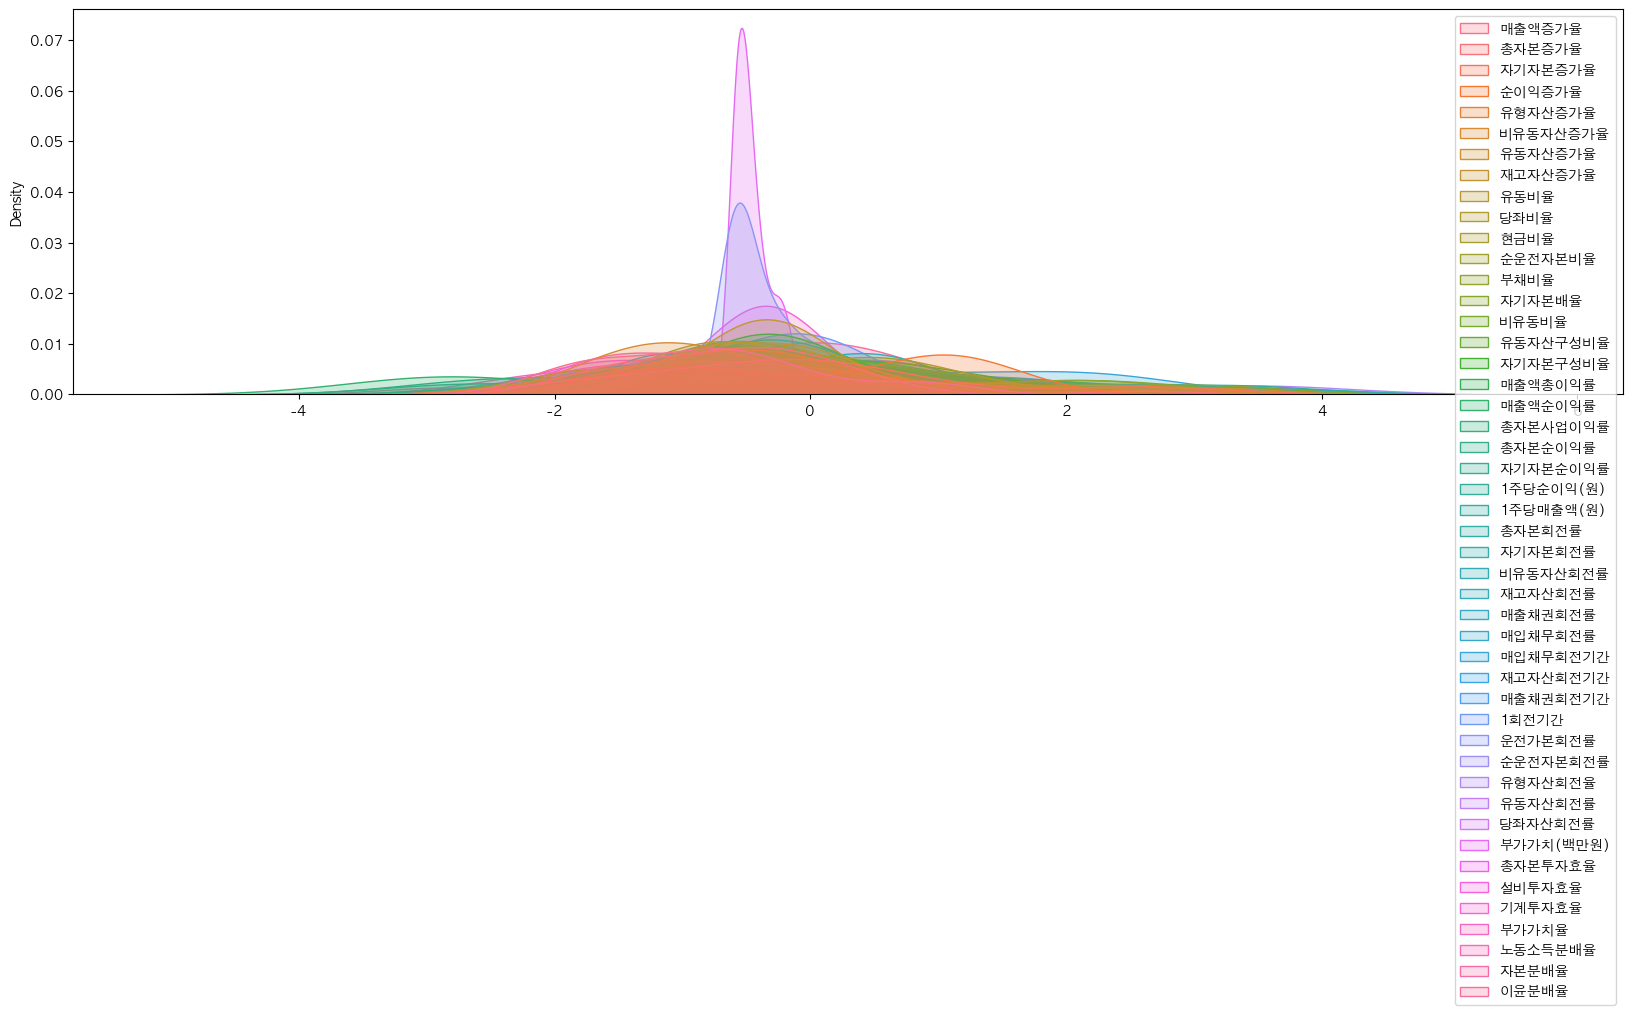

In [1028]:
plt.figure(figsize=(20,5))
plt.rc("axes", unicode_minus = False)
# sns.kdeplot(data = kospi, color = "red", shade = True)
# sns.kdeplot(data = kospi_js, color = "blue", shade = True)
sns.kdeplot(data = kospi_bs, color = "green", shade = True)
plt.show()

In [1029]:
kospibs = '(주)동성화학', '(주)사조해표', '(주)신한', '(주)폴루스바이오팜', '고려개발(주)', '롯데푸드(주)', '에스비에스미디어홀딩스(주)', '웅진에너지(주)', '코리아오토글라스(주)', '한국제지(주)'

In [1030]:
kospi["부실여부"] = kospi['회사명'].apply(lambda x: 1 if x in kospibs else 0)

In [1031]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 종속 변수와 독립 변수를 준비합니다.
# X는 독립 변수들로 이루어진 2차원 배열이어야 합니다.
# y는 종속 변수로 이루어진 1차원 배열이어야 합니다.
X = kospi[["매출액증가율", "총자본증가율", "자기자본증가율", "순이익증가율", "유형자산증가율", "비유동자산증가율", 
          "유동자산증가율", "재고자산증가율", "유동비율", "당좌비율", "현금비율", "순운전자본비율", "부채비율", 
          "자기자본배율", "비유동비율", "유동자산구성비율", "자기자본구성비율", "매출액총이익률", "매출액순이익률", 
          "총자본사업이익률", "총자본순이익률", "자기자본순이익률", "1주당순이익(원)", "1주당매출액(원)", "총자본회전률", 
          "자기자본회전률", "비유동자산회전률", "재고자산회전률", "매출채권회전률", "매입채무회전률", "매입채무회전기간", 
          "재고자산회전기간", "매출채권회전기간", "1회전기간", "운전가본회전률", "순운전자본회전률", "유형자산회전율", 
          "유동자산회전률", "당좌자산회전률", "부가가치(백만원)", "총자본투자효율", "설비투자효율", "기계투자효율", 
          "부가가치율", "노동소득분배율", "자본분배율", "이윤분배율"]]  # 독립 변수 데이터
y = kospi["부실여부"] # 종속 변수 데이터

# 데이터를 훈련 세트와 테스트 세트로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 라쏘 모델을 생성하고 훈련합니다.
lasso = Lasso(alpha=0.5)  # alpha 값은 규제의 강도를 나타냅니다.
lasso.fit(X_train, y_train)

# 테스트 세트로 예측을 수행합니다.
y_pred = lasso.predict(X_test)

# 분류 모델일 경우, 예측 결과를 이진 형태로 변환합니다.
y_pred_binary = (y_pred > 0.5).astype(int)

# 분류 정확도를 평가합니다.
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

Accuracy: 0.9944289693593314


In [1032]:
kosdaqbs = '(주)썬테크놀로지스', '참존글로벌(주)', '(주)레드로버', '(주)뉴로스', '(주)연이비앤티', 
'(주)소리바다', '에스에이치엔엘(주)', '(주)세영디앤씨', '현진소재(주)', '(주)한프',
'지스마트글로벌(주)', '자안바이오(주)', '(주)이엠네트웍스', '(주)코너스톤네트웍스', 
'에이아이비트(주)', '(주)지유온', '(주)맥스로텍', '(주)에스제이케이', '디에스티(주)', 
'(주)팍스넷', '럭슬(주)', '(주)제낙스', '(주)아이엠텍', '(주)퓨전', '(주)행남사',
'(주)에이팸', '(주)에이치디', '(주)미래SCI', '(주)이매진아시아', '(주)파티게임즈', 
'(주)바이오빌', '(주)모다', '(주)화진', '(주)에스에프씨', '이엘케이(주)', '(주)에스마크',
'(주)피앤텔', '(주)파인넥스', '(주)제이테크놀로지', '(주)데코앤이', '(주)에프티이앤이',
'(주)이십일스토어', '(주)화신테크', '미래오토스', '에스지에이클라우드서비스(주)'
kosdaq["부실여부"] = kosdaq['회사명'].apply(lambda x: 1 if x in kosdaqbs else 0)
kosdaq.head()

,회사명,거래소코드,회계년도,매출액증가율,총자본증가율,자기자본증가율,순이익증가율,유형자산증가율,비유동자산증가율,유동자산증가율,...,설비투자효율,기계투자효율,부가가치율,노동소득분배율,자본분배율,이윤분배율,상장폐지일,소속코드,상장일,부실여부
0,(주)CMG제약,58820,2018-12-01,20.05,4.39,6.16,113.940000,6.71,16.47,0.18,...,106.25,478.91,33.79,67.33,32.67,36.00,NaN,5,2001-08-31,0
1,(주)CMG제약,58820,2019-12-01,17.56,68.07,73.26,-49.690000,39.67,26.20,85.06,...,114.60,438.05,32.47,72.60,27.40,16.03,NaN,5,2001-08-31,0
2,(주)CMG제약,58820,2020-12-01,9.96,1.62,0.54,-92.950000,23.31,18.52,-3.06,...,108.22,475.13,26.40,86.14,13.86,1.26,NaN,5,2001-08-31,0
3,(주)CMG제약,58820,2021-12-01,7.78,1.95,1.97,1372.340000,2.61,49.25,-14.04,...,126.93,601.75,27.77,77.39,22.61,16.41,NaN,5,2001-08-31,0
4,(주)CMG제약,58820,2022-12-01,18.31,7.07,0.14,60.737581,22.79,6.10,7.64,...,106.98,537.68,19.38,104.24,-4.24,-2.44,NaN,5,2001-08-31,0


In [1033]:
# 종속 변수와 독립 변수를 준비합니다.
# X는 독립 변수들로 이루어진 2차원 배열이어야 합니다.
# y는 종속 변수로 이루어진 1차원 배열이어야 합니다.
X = kosdaq[["매출액증가율", "총자본증가율", "자기자본증가율", "순이익증가율", "유형자산증가율", "비유동자산증가율", 
          "유동자산증가율", "재고자산증가율", "유동비율", "당좌비율", "현금비율", "순운전자본비율", "부채비율", 
          "자기자본배율", "비유동비율", "유동자산구성비율", "자기자본구성비율", "매출액총이익률", "매출액순이익률", 
          "총자본사업이익률", "총자본순이익률", "자기자본순이익률", "1주당순이익(원)", "1주당매출액(원)", "총자본회전률", 
          "자기자본회전률", "비유동자산회전률", "재고자산회전률", "매출채권회전률", "매입채무회전률", "매입채무회전기간", 
          "재고자산회전기간", "매출채권회전기간", "1회전기간", "운전가본회전률", "순운전자본회전률", "유형자산회전율", 
          "유동자산회전률", "당좌자산회전률", "부가가치(백만원)", "총자본투자효율", "설비투자효율", "기계투자효율", 
          "부가가치율", "노동소득분배율", "자본분배율", "이윤분배율"]]  # 독립 변수 데이터
y = kosdaq["부실여부"] # 종속 변수 데이터

# 데이터를 훈련 세트와 테스트 세트로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 라쏘 모델을 생성하고 훈련합니다.
lasso = Lasso(alpha=0.5)  # alpha 값은 규제의 강도를 나타냅니다.
lasso.fit(X_train, y_train)

# 테스트 세트로 예측을 수행합니다.
y_pred = lasso.predict(X_test)

# 분류 모델일 경우, 예측 결과를 이진 형태로 변환합니다.
y_pred_binary = (y_pred > 0.5).astype(int)

# 분류 정확도를 평가합니다.
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

Accuracy: 0.9985074626865672


In [1034]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
X = kosdaq[["매출액증가율", "총자본증가율", "자기자본증가율", "순이익증가율", "유형자산증가율", "비유동자산증가율", 
          "유동자산증가율", "재고자산증가율", "유동비율", "당좌비율", "현금비율", "순운전자본비율", "부채비율", 
          "자기자본배율", "비유동비율", "유동자산구성비율", "자기자본구성비율", "매출액총이익률", "매출액순이익률", 
          "총자본사업이익률", "총자본순이익률", "자기자본순이익률", "1주당순이익(원)", "1주당매출액(원)", "총자본회전률", 
          "자기자본회전률", "비유동자산회전률", "재고자산회전률", "매출채권회전률", "매입채무회전률", "매입채무회전기간", 
          "재고자산회전기간", "매출채권회전기간", "1회전기간", "운전가본회전률", "순운전자본회전률", "유형자산회전율", 
          "유동자산회전률", "당좌자산회전률", "부가가치(백만원)", "총자본투자효율", "설비투자효율", "기계투자효율", 
          "부가가치율", "노동소득분배율", "자본분배율", "이윤분배율"]]
y = kosdaq["부실여부"]

# 학습용 데이터와 검증용 데이터로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso 모델 정의
lasso = Lasso(alpha=0.1)

# Lasso 모델 학습
lasso.fit(X_train, y_train)

# 검증용 데이터로 예측 수행
y_pred = lasso.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: ', mse)

Mean squared error:  0.0015187676593426817


In [1035]:
data = pd.concat([kospi, kosdaq], axis = 0)

In [1036]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

data_feature = data[["매출액증가율", "총자본증가율", "자기자본증가율", "순이익증가율", "유형자산증가율", "비유동자산증가율", 
          "유동자산증가율", "재고자산증가율", "유동비율", "당좌비율", "현금비율", "순운전자본비율", "부채비율", 
          "자기자본배율", "비유동비율", "유동자산구성비율", "자기자본구성비율", "매출액총이익률", "매출액순이익률", 
          "총자본사업이익률", "총자본순이익률", "자기자본순이익률", "1주당순이익(원)", "1주당매출액(원)", "총자본회전률", 
          "자기자본회전률", "비유동자산회전률", "재고자산회전률", "매출채권회전률", "매입채무회전률", "매입채무회전기간", 
          "재고자산회전기간", "매출채권회전기간", "1회전기간", "운전가본회전률", "순운전자본회전률", "유형자산회전율", 
          "유동자산회전률", "당좌자산회전률", "부가가치(백만원)", "총자본투자효율", "설비투자효율", "기계투자효율", 
          "부가가치율", "노동소득분배율", "자본분배율", "이윤분배율"]]

feature = data_feature
target = data['부실여부']

lasso = SelectFromModel(LogisticRegression(C=0.05, penalty='l1',solver='liblinear'))
lasso.fit(feature, target)
lasso_support = lasso.get_support()
lr_feature = feature.loc[:,lasso_support].columns.tolist()
lr_feature

['매출액증가율',
 '자기자본증가율',
 '유형자산증가율',
 '유동자산증가율',
 '재고자산증가율',
 '유동비율',
 '당좌비율',
 '현금비율',
 '순운전자본비율',
 '자기자본배율',
 '비유동비율',
 '유동자산구성비율',
 '자기자본구성비율',
 '매출액총이익률',
 '매출액순이익률',
 '총자본사업이익률',
 '총자본순이익률',
 '자기자본순이익률',
 '1주당순이익(원)',
 '재고자산회전률',
 '매출채권회전률',
 '매입채무회전기간',
 '재고자산회전기간',
 '매출채권회전기간',
 '유형자산회전율',
 '부가가치(백만원)',
 '총자본투자효율',
 '부가가치율',
 '노동소득분배율',
 '자본분배율',
 '이윤분배율']

In [1037]:
from sklearn.feature_selection import SelectKBest, f_classif

data_feature = data[["매출액증가율", "총자본증가율", "자기자본증가율", "순이익증가율", "유형자산증가율", "비유동자산증가율", 
          "유동자산증가율", "재고자산증가율", "유동비율", "당좌비율", "현금비율", "순운전자본비율", "부채비율", 
          "자기자본배율", "비유동비율", "유동자산구성비율", "자기자본구성비율", "매출액총이익률", "매출액순이익률", 
          "총자본사업이익률", "총자본순이익률", "자기자본순이익률", "1주당순이익(원)", "1주당매출액(원)", "총자본회전률", 
          "자기자본회전률", "비유동자산회전률", "재고자산회전률", "매출채권회전률", "매입채무회전률", "매입채무회전기간", 
          "재고자산회전기간", "매출채권회전기간", "1회전기간", "운전가본회전률", "순운전자본회전률", "유형자산회전율", 
          "유동자산회전률", "당좌자산회전률", "부가가치(백만원)", "총자본투자효율", "설비투자효율", "기계투자효율", 
          "부가가치율", "노동소득분배율", "자본분배율", "이윤분배율"]]

# 독립변수와 종속변수를 분리합니다.
X = data_feature
y = data['부실여부']

# f 검정 방법을 사용해 피처를 선택합니다.'k=선정개수'
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# 선택된 피처를 출력합니다.
print(X.columns[selector.get_support()])

Index(['순운전자본비율', '자기자본배율', '유동자산구성비율', '자기자본구성비율', '총자본순이익률', '총자본회전률',
       '순운전자본회전률', '유동자산회전률', '당좌자산회전률', '총자본투자효율'],
      dtype='object')


In [1038]:
from scipy.stats import ttest_ind

t, p = ttest_ind(data_feature, data["부실여부"])
print("t-value:", t)
print("p-value:", p)

t-value: [  2.0808025   27.15511243   9.3904685    1.6025346    5.95805293
  14.08373776  17.26173358   3.09973487   2.08246477   1.92067009
   2.64037881  53.97295618  20.82470437  55.95920684  31.13917767
 118.72759192 120.03256132  40.58812728  -2.66590804  11.92897329
  -7.6941145   -7.98582623  12.05093857  26.38390462  61.31460673
  64.09683794  46.23051737   5.5874255   15.08130062   2.30259315
   5.19910226   2.67519353  28.42071043   1.45227481   6.38290763
  69.68892597  10.20535725  77.86076068  75.95299361  34.60185434
  44.62433845   0.95759839   3.06701093  -2.1715791    6.42331541
  -1.89249325  -2.92311533]
p-value: [3.74643297e-002 1.42573003e-159 6.57766047e-021 1.09052797e-001
 2.59416741e-009 7.72608497e-045 2.67836388e-066 1.93955372e-003
 3.73123632e-002 5.47871213e-002 8.28759317e-003 0.00000000e+000
 2.48856723e-095 0.00000000e+000 4.71817045e-208 0.00000000e+000
 0.00000000e+000 0.00000000e+000 7.68406931e-003 1.07171651e-032
 1.48877146e-014 1.46867732e-015 2.

In [1039]:
# Train/test set으로 분리
train = data.loc[data["회계년도"] < '2021-01-01',:]
test = data.loc[data["회계년도"] >= '2021-01-01',:]
print(train.shape, test.shape)

(5958, 54) (4328, 54)


In [1040]:
# lasso
['매출액증가율', '자기자본증가율', '유형자산증가율', '유동자산증가율', '재고자산증가율', '유동비율',
 '당좌비율', '현금비율', '순운전자본비율', '자기자본배율', '비유동비율', '유동자산구성비율', '자기자본구성비율',
 '매출액총이익률', '매출액순이익률', '총자본사업이익률', '자기자본순이익률', '1주당순이익(원)', '재고자산회전률',
 '매출채권회전률', '매입채무회전기간', '재고자산회전기간', '매출채권회전기간', '유형자산회전율', '부가가치(백만원)',
 '총자본투자효율', '부가가치율', '노동소득분배율', '자본분배율', '이윤분배율']

# select k best
['순운전자본비율', '자기자본배율', '유동자산구성비율', '자기자본구성비율', '총자본순이익률', '총자본회전률',
       '순운전자본회전률', '유동자산회전률', '당좌자산회전률', '총자본투자효율']

# t-test 결과
["순운전자본비율", "자기자본배율", "유동자산구성비율", "자기자본구성비율",
 "매출액총이익률", "총자본회전률", "자기자본회전률", "비유동자산회전률",
 "순운전자본회전률", "유동자산회전률", "당좌자산회전률", "총자본투자효율"]

# 공통 피쳐
[ '유동자산구성비율', '자기자본구성비율', '총자본투자효율']
# 안정성, 안정성, 안정성, 안정성, 생산성

# 두가지 공통피쳐
['유동자산구성비율', '자기자본구성비율', '총자본투자효율', '순운전자본회전률', '당좌자산회전률', '매출액총이익률']

['유동자산구성비율', '자기자본구성비율', '총자본투자효율', '순운전자본회전률', '당좌자산회전률', '매출액총이익률']

In [1041]:
data

,회사명,거래소코드,회계년도,매출액증가율,총자본증가율,자기자본증가율,순이익증가율,유형자산증가율,비유동자산증가율,유동자산증가율,...,설비투자효율,기계투자효율,부가가치율,노동소득분배율,자본분배율,이윤분배율,상장폐지일,소속코드,상장일,부실여부
0,(주)DB하이텍,990,2018-12-01,-0.545082,0.029407,1.056604,-0.950430,0.106446,-0.064104,-0.024497,...,-0.307570,-0.359919,1.901851,-0.514174,0.743839,0.629616,NaN,1,1975-12-12,0
1,(주)DB하이텍,990,2019-12-01,0.696357,-0.393348,0.580566,-0.662053,-0.150118,-0.690984,0.115852,...,-0.249279,-0.360986,1.964812,-0.681920,0.923410,0.613246,NaN,1,1975-12-12,0
2,(주)DB하이텍,990,2020-12-01,0.432174,0.105828,1.107175,-0.398156,0.215398,0.056872,-0.058201,...,-0.095095,-0.353156,2.255392,-0.882431,1.138056,0.833252,NaN,1,1975-12-12,0
3,(주)DB하이텍,990,2021-12-01,1.207933,1.997657,2.181970,-0.175476,-0.482831,-0.358459,2.395941,...,0.385785,-0.333188,2.255392,-1.186938,1.464028,1.102692,NaN,1,1975-12-12,0
4,(주)DB하이텍,990,2022-12-01,1.663538,2.439924,2.677024,-0.275890,0.377069,0.032936,2.395941,...,0.905778,-0.314447,2.255392,-1.330109,1.468603,1.404545,NaN,1,1975-12-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,흥구석유(주),24060,2018-12-01,6.870000,-5.890000,0.990000,14.780000,-0.360000,-2.090000,-21.190000,...,19.560000,3064.100000,4.440000,47.470000,52.530000,32.140000,NaN,5,1994-12-07,0
7654,흥구석유(주),24060,2019-12-01,-9.350000,11.240000,9.310000,249.940000,-7.000000,-2.630000,80.740000,...,42.990000,3489.210000,10.000000,22.190000,77.810000,55.020000,NaN,5,1994-12-07,0
7655,흥구석유(주),24060,2020-12-01,-23.780000,0.070000,3.380000,-42.220000,-13.920000,-8.210000,22.410000,...,34.040000,3280.800000,8.940000,30.410000,69.590000,46.650000,NaN,5,1994-12-07,0
7656,흥구석유(주),24060,2021-12-01,15.120000,-1.280000,-0.880000,-70.810000,0.630000,0.180000,-4.240000,...,19.150000,1308.440000,4.380000,53.220000,46.780000,24.130000,NaN,5,1994-12-07,0


In [1042]:
data.columns

Index(['회사명', '거래소코드', '회계년도', '매출액증가율', '총자본증가율', '자기자본증가율', '순이익증가율',
       '유형자산증가율', '비유동자산증가율', '유동자산증가율', '재고자산증가율', '유동비율', '당좌비율', '현금비율',
       '순운전자본비율', '부채비율', '자기자본배율', '비유동비율', '유동자산구성비율', '자기자본구성비율', '매출액총이익률',
       '매출액순이익률', '총자본사업이익률', '총자본순이익률', '자기자본순이익률', '1주당순이익(원)', '1주당매출액(원)',
       '총자본회전률', '자기자본회전률', '비유동자산회전률', '재고자산회전률', '매출채권회전률', '매입채무회전률',
       '매입채무회전기간', '재고자산회전기간', '매출채권회전기간', '1회전기간', '운전가본회전률', '순운전자본회전률',
       '유형자산회전율', '유동자산회전률', '당좌자산회전률', '부가가치(백만원)', '총자본투자효율', '설비투자효율',
       '기계투자효율', '부가가치율', '노동소득분배율', '자본분배율', '이윤분배율', '상장폐지일', '소속코드', '상장일',
       '부실여부'],
      dtype='object')

In [1043]:
train = data.loc[data["회계년도"] < '2021-01-01',:]
test = data.loc[data["회계년도"] >= '2021-01-01',:]

In [1044]:
train = data.loc[data["회계년도"] < '2021-01-01',:]
test = data.loc[data["회계년도"] >= '2021-01-01',:]

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train = train[['유동자산구성비율', '자기자본구성비율', '총자본투자효율', '순운전자본회전률', '당좌자산회전률', '매출액총이익률']]
y_train = train['부실여부']
X_test = test[['유동자산구성비율', '자기자본구성비율', '총자본투자효율', '순운전자본회전률', '당좌자산회전률', '매출액총이익률']]
y_test = test['부실여부']

# 모델 선택 및 훈련
model = LogisticRegression()
model.fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9983826247689463


In [1045]:
danger_f = data[['유동자산구성비율', '자기자본구성비율', '총자본투자효율', '순운전자본회전률', '당좌자산회전률', '매출액총이익률']]

In [1046]:
df1 = pd.read_csv("./공모전파일/1분기.csv", encoding = "euc-kr")
df2 = pd.read_csv("./공모전파일/2분기.csv", encoding = "euc-kr")
df3 = pd.read_csv("./공모전파일/3분기.csv", encoding = "euc-kr")
df4 = pd.read_csv("./공모전파일/4분기.csv", encoding = "euc-kr")

In [1047]:
df1.columns = ['회사명', '거래소코드', '회계년도', '유동자산', '총자산', '총자본', '매출액', '부채', '당기순이익', '유동부채', '매출원가', '재고자산', '선급금']
df2.columns = ['회사명', '거래소코드', '회계년도', '유동자산', '총자산', '총자본', '매출액', '부채', '당기순이익', '유동부채', '매출원가', '재고자산', '선급금']
df3.columns = ['회사명', '거래소코드', '회계년도', '유동자산', '총자산', '총자본', '매출액', '부채', '당기순이익', '유동부채', '매출원가', '재고자산', '선급금']
df4.columns = ['회사명', '거래소코드', '회계년도', '유동자산', '총자산', '총자본', '매출액', '부채', '당기순이익', '유동부채', '매출원가', '재고자산', '선급금']

In [1048]:
# df1['유동자산구성비율'] = df1['유동자산'] / df1['총자산'] * 100
# df1['자기자본구성비율'] = (df1['총자본'] - df1['부채']) / df1['총자산'] * 100
# df1['총자본투자효율'] = df1['당기순이익'] / df1['총자본'] * 100
# df1['순운전자본회전률'] = df1['매출액'] / (df1['유동자산'] - df1['유동부채'])
# df1['당좌자산회전률'] = df1['매출액'] / (df1['유동자산'] - df1['재고자산'] - df1['선급금'])
# df1['매출액총이익률'] = (df1['매출액'] - df1['매출원가']) / df1['매출액'] * 100

In [1049]:
# df1[['회사명', '거래소코드', '회계년도', '유동자산구성비율', '자기자본구성비율','총자본투자효율', '순운전자본회전률', '당좌자산회전률', '매출액총이익률']]

In [1050]:
df_1 = df1[['유동자산', '총자산', '총자본', '매출액', '부채', '당기순이익', '유동부채', '매출원가', '재고자산', '선급금']]
df_2 = df2[['유동자산', '총자산', '총자본', '매출액', '부채', '당기순이익', '유동부채', '매출원가', '재고자산', '선급금']]
df_3 = df3[['유동자산', '총자산', '총자본', '매출액', '부채', '당기순이익', '유동부채', '매출원가', '재고자산', '선급금']]
df_4 = df4[['유동자산', '총자산', '총자본', '매출액', '부채', '당기순이익', '유동부채', '매출원가', '재고자산', '선급금']]

In [1051]:
df_4 = df_4 - df_3
df_3 = df_3 - df_2
df_2 = df_2 - df_1

In [1052]:
d2 = df2[['회사명', '거래소코드', '회계년도']]
d2['유동자산'] = df_2['유동자산']
d2['총자산'] = df_2['총자산']
d2['총자본'] = df_2['총자본']
d2['매출액'] = df_2['매출액']
d2['부채'] = df_2['부채']
d2['당기순이익'] = df_2['당기순이익']
d2['유동부채'] = df_2['유동부채']
d2['매출원가'] = df_2['매출원가']
d2['재고자산'] = df_2['재고자산']
d2['선급금'] = df_2['선급금']

/var/folders/xs/8nhrbkk97jzf2f4zjswkk0b80000gn/T/ipykernel_7760/280395230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['유동자산'] = df_2['유동자산']
/var/folders/xs/8nhrbkk97jzf2f4zjswkk0b80000gn/T/ipykernel_7760/280395230.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['총자산'] = df_2['총자산']
/var/folders/xs/8nhrbkk97jzf2f4zjswkk0b80000gn/T/ipykernel_7760/280395230.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [1053]:
d3 = df3[['회사명', '거래소코드', '회계년도']]
d3['유동자산'] = df_3['유동자산']
d3['총자산'] = df_3['총자산']
d3['총자본'] = df_3['총자본']
d3['매출액'] = df_3['매출액']
d3['부채'] = df_3['부채']
d3['당기순이익'] = df_3['당기순이익']
d3['유동부채'] = df_3['유동부채']
d3['매출원가'] = df_3['매출원가']
d3['재고자산'] = df_3['재고자산']
d3['선급금'] = df_3['선급금']

/var/folders/xs/8nhrbkk97jzf2f4zjswkk0b80000gn/T/ipykernel_7760/1727961441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d3['유동자산'] = df_3['유동자산']
/var/folders/xs/8nhrbkk97jzf2f4zjswkk0b80000gn/T/ipykernel_7760/1727961441.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d3['총자산'] = df_3['총자산']
/var/folders/xs/8nhrbkk97jzf2f4zjswkk0b80000gn/T/ipykernel_7760/1727961441.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [1054]:
d4 = df4[['회사명', '거래소코드', '회계년도']]
d4['유동자산'] = df_4['유동자산']
d4['총자산'] = df_4['총자산']
d4['총자본'] = df_4['총자본']
d4['매출액'] = df_4['매출액']
d4['부채'] = df_4['부채']
d4['당기순이익'] = df_4['당기순이익']
d4['유동부채'] = df_4['유동부채']
d4['매출원가'] = df_4['매출원가']
d4['재고자산'] = df_4['재고자산']
d4['선급금'] = df_4['선급금']

/var/folders/xs/8nhrbkk97jzf2f4zjswkk0b80000gn/T/ipykernel_7760/2798913930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d4['유동자산'] = df_4['유동자산']
/var/folders/xs/8nhrbkk97jzf2f4zjswkk0b80000gn/T/ipykernel_7760/2798913930.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d4['총자산'] = df_4['총자산']
/var/folders/xs/8nhrbkk97jzf2f4zjswkk0b80000gn/T/ipykernel_7760/2798913930.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [1055]:
d1 = df1

In [1056]:
d1

,회사명,거래소코드,회계년도,유동자산,총자산,총자본,매출액,부채,당기순이익,유동부채,매출원가,재고자산,선급금
0,(주)DB하이텍,990,2018/03,384738630,1026550749,473495476,138444869,553055273,2096938,173777537,101299651,41750324,0
1,(주)DB하이텍,990,2019/03,391293536,1084951289,559809990,159579695,525141298,16123092,181003279,111796970,48787554,0
2,(주)DB하이텍,990,2020/03,475541647,1147544132,684896720,225803046,462647412,55064822,237537339,133623375,54081696,0
3,(주)DB하이텍,990,2021/03,491797001,1196237772,828473158,243736209,367764614,47810549,252740606,152430236,51074096,0
4,(주)DB하이텍,990,2022/03,928694599,1685682344,1245226271,395024843,440456073,158684675,338762029,178195856,73681776,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,(주)홈센타홀딩스,60560,2018/03,72729653,349555398,158584791,49571776,190970607,-5051972,127079985,48017574,6555608,1030369
96,(주)홈센타홀딩스,60560,2019/03,81533630,324243642,141298405,54813996,182945237,-1268717,131580663,50299091,6087569,836565
97,(주)홈센타홀딩스,60560,2020/03,74119822,329959539,140944677,60312281,189014862,-1177661,148071589,55620231,4770132,3344813
98,(주)홈센타홀딩스,60560,2021/03,106671711,383712152,185083548,64854796,198628603,101004,104783126,59355976,18600696,1619807


In [1057]:
d2

,회사명,거래소코드,회계년도,유동자산,총자산,총자본,매출액,부채,당기순이익,유동부채,매출원가,재고자산,선급금
0,(주)DB하이텍,990,2018/06,18018134,24438501,35645732,174061145,-11207231,34196294,1464984,114552545,-2105790,0
1,(주)DB하이텍,990,2019/06,59080367,49888829,31366652,213485074,18522178,31371761,-12035935,131552693,1067748,0
2,(주)DB하이텍,990,2020/06,-75025944,-28465611,50177927,241651067,-78643537,50352602,21540021,136636285,712545,0
3,(주)DB하이텍,990,2021/06,49761947,52662906,59213604,274650520,-6550698,59042973,-6583851,160499383,739074,0
4,(주)DB하이텍,990,2022/06,137064920,152597831,161426202,435741783,-8828371,160944371,-2916402,185835698,-129555,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,(주)홈센타홀딩스,60560,2018/06,630112,-413709,2900775,64836965,-3314484,1281129,10063817,56959547,-786203,-712031
96,(주)홈센타홀딩스,60560,2019/06,-22236262,6956471,11495,61916972,6944975,-622278,479560,55934088,810147,2681143
97,(주)홈센타홀딩스,60560,2020/06,2433667,19759236,2298461,67251222,17460775,2127694,4658682,58361779,-24386,-196111
98,(주)홈센타홀딩스,60560,2021/06,3971991,3542330,4366985,79602665,-824655,2654160,10238573,70339829,164396,2797255


In [1058]:
d3

,회사명,거래소코드,회계년도,유동자산,총자산,총자본,매출액,부채,당기순이익,유동부채,매출원가,재고자산,선급금
0,(주)DB하이텍,990,2018/09,408831,7470493,30792311,183739992,-23321817,32941842,5517670,118644299,-1958498,0
1,(주)DB하이텍,990,2019/09,-17863422,-17738303,44773215,222319992,-62511518,44638672,35152356,134639417,6503156,0
2,(주)DB하이텍,990,2020/09,50949990,38353360,46516911,240646807,-8163553,47042231,167131,142913232,-272125,0
3,(주)DB하이텍,990,2021/09,122894988,113629031,92913285,328439858,20715746,92666035,31607099,174138795,7460261,0
4,(주)DB하이텍,990,2022/09,180328199,217598926,171547733,447380224,46051193,170827731,48328953,184290344,-3780533,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,(주)홈센타홀딩스,60560,2018/09,-10112198,-13336797,-4757929,59170065,-8578868,-4784657,-2460423,55371278,645475,169703
96,(주)홈센타홀딩스,60560,2019/09,-1694893,-6431567,-954481,65701496,-5477085,-869281,483326,59906119,-944549,-586815
97,(주)홈센타홀딩스,60560,2020/09,-1599072,-1936584,1051602,57627172,-2988186,-1075995,-27186156,52988150,-148177,1806420
98,(주)홈센타홀딩스,60560,2021/09,6745253,2284072,2896599,83948697,-612526,4202197,2473445,73330727,1039094,-1055999


In [1059]:
d4

,회사명,거래소코드,회계년도,유동자산,총자산,총자본,매출액,부채,당기순이익,유동부채,매출원가,재고자산,선급금
0,(주)DB하이텍,990,2018/12,-19786658,8074097,18458012,173033130,-10383916,17593694,-23963741,119446260,5205613,630000
1,(주)DB하이텍,990,2019/12,-6247060,-28212005,8700873,212031662,-36912878,12503487,15595856,135303557,-4520617,1226000
2,(주)DB하이텍,990,2020/12,7742434,21149316,12992955,227818846,8156363,13565936,2459510,163862052,-2673346,830000
3,(주)DB하이텍,990,2021/12,150707963,187408187,125449659,367855453,61958528,117372295,57572999,192417023,6743707,13267261
4,(주)DB하이텍,990,2022/12,81636402,66821374,60083872,397140684,6737501,68379885,20179382,193747867,3996917,11527919
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,(주)홈센타홀딩스,60560,2018/12,17447211,-11927938,-18781578,65434313,6853640,-26899261,-1540426,61501783,-1468564,217460
96,(주)홈센타홀딩스,60560,2019/12,16420879,4185601,1905414,83213898,2280187,2537575,12068088,73666661,-1314350,-1343086
97,(주)홈센타홀딩스,60560,2020/12,10231383,10997978,11162296,70709089,-164318,6603285,-7327267,60215852,13607115,-2832668
98,(주)홈센타홀딩스,60560,2021/12,3917608,8542318,6440826,96596247,2101492,6719745,3847012,81490446,-2467356,-126687


In [1060]:
d1['유동자산구성비율'] = d1['유동자산'] / d1['총자산'] * 100
d1['자기자본구성비율'] = (d1['총자본'] - d1['부채']) / d1['총자산'] * 100
d1['총자본투자효율'] = d1['당기순이익'] / d1['총자본'] * 100
d1['순운전자본회전률'] = d1['매출액'] / (d1['유동자산'] - d1['유동부채'])
d1['당좌자산회전률'] = d1['매출액'] / (d1['유동자산'] - d1['재고자산'] - df1['선급금'])
d1['매출액총이익률'] = (d1['매출액'] - d1['매출원가']) / d1['매출액'] * 100

In [1061]:
d1 = d1[['회사명', '거래소코드', '회계년도','유동자산구성비율', '자기자본구성비율', '총자본투자효율', '순운전자본회전률', '당좌자산회전률', '매출액총이익률']]

In [1062]:
d2['유동자산구성비율'] = d2['유동자산'] / d2['총자산'] * 100
d2['자기자본구성비율'] = (d2['총자본'] - d2['부채']) / d2['총자산'] * 100
d2['총자본투자효율'] = d2['당기순이익'] / d2['총자본'] * 100
d2['순운전자본회전률'] = d2['매출액'] / (d2['유동자산'] - d2['유동부채'])
d2['당좌자산회전률'] = d2['매출액'] / (d2['유동자산'] - d2['재고자산'] - d2['선급금'])
d2['매출액총이익률'] = (d2['매출액'] - d2['매출원가']) / d2['매출액'] * 100

In [1063]:
d2 = d2[['회사명', '거래소코드', '회계년도','유동자산구성비율', '자기자본구성비율', '총자본투자효율', '순운전자본회전률', '당좌자산회전률', '매출액총이익률']]

In [1064]:
d3['유동자산구성비율'] = d3['유동자산'] / d3['총자산'] * 100
d3['자기자본구성비율'] = (d3['총자본'] - d3['부채']) / d3['총자산'] * 100
d3['총자본투자효율'] = d3['당기순이익'] / d3['총자본'] * 100
d3['순운전자본회전률'] = d3['매출액'] / (d3['유동자산'] - d3['유동부채'])
d3['당좌자산회전률'] = d3['매출액'] / (d3['유동자산'] - d3['재고자산'] - d3['선급금'])
d3['매출액총이익률'] = (d3['매출액'] - d3['매출원가']) / d3['매출액'] * 100

In [1065]:
d3 = d3[['회사명', '거래소코드', '회계년도','유동자산구성비율', '자기자본구성비율', '총자본투자효율', '순운전자본회전률', '당좌자산회전률', '매출액총이익률']]

In [1066]:
d4['유동자산구성비율'] = d4['유동자산'] / d4['총자산'] * 100
d4['자기자본구성비율'] = (d4['총자본'] - d4['부채']) / d4['총자산'] * 100
d4['총자본투자효율'] = d4['당기순이익'] / d4['총자본'] * 100
d4['순운전자본회전률'] = d4['매출액'] / (d4['유동자산'] - d4['유동부채'])
d4['당좌자산회전률'] = d4['매출액'] / (d4['유동자산'] - d4['재고자산'] - d4['선급금'])
d4['매출액총이익률'] = (d4['매출액'] - d4['매출원가']) / d4['매출액'] * 100

In [1067]:
d4 = d4[['회사명', '거래소코드', '회계년도','유동자산구성비율', '자기자본구성비율', '총자본투자효율', '순운전자본회전률', '당좌자산회전률', '매출액총이익률']]

In [1068]:
d1

,회사명,거래소코드,회계년도,유동자산구성비율,자기자본구성비율,총자본투자효율,순운전자본회전률,당좌자산회전률,매출액총이익률
0,(주)DB하이텍,990,2018/03,37.478773,-7.750206,0.442863,0.656258,0.403643,26.830332
1,(주)DB하이텍,990,2019/03,36.065540,3.195415,2.880101,0.758854,0.465918,29.942860
2,(주)DB하이텍,990,2020/03,41.439944,19.367387,8.039872,0.948735,0.535764,40.823041
3,(주)DB하이텍,990,2021/03,41.111977,38.513125,5.770923,1.019576,0.553037,37.460980
4,(주)DB하이텍,990,2022/03,55.093096,47.741510,12.743441,0.669610,0.462010,54.889962
...,...,...,...,...,...,...,...,...,...
95,(주)홈센타홀딩스,60560,2018/03,20.806331,-9.264859,-3.185660,-0.912079,0.760961,3.135256
96,(주)홈센타홀딩스,60560,2019/03,25.145791,-12.844302,-0.897899,-1.095250,0.734679,8.236774
97,(주)홈센타홀딩스,60560,2020/03,22.463306,-14.568509,-0.835548,-0.815562,0.913755,7.779593
98,(주)홈센타홀딩스,60560,2021/03,27.799930,-3.530004,0.054572,34.340417,0.750190,8.478664


In [1069]:
d2

,회사명,거래소코드,회계년도,유동자산구성비율,자기자본구성비율,총자본투자효율,순운전자본회전률,당좌자산회전률,매출액총이익률
0,(주)DB하이텍,990,2018/06,73.728475,191.717827,95.933768,10.515288,8.649463,34.188331
1,(주)DB하이텍,990,2019/06,118.424040,25.746193,100.016288,3.001915,3.679976,38.378506
2,(주)DB하이텍,990,2020/06,263.566955,-452.551199,100.348111,-2.502446,-3.190598,43.457198
3,(주)DB하이텍,990,2021/06,94.491457,124.877845,99.711838,4.874374,5.602497,41.562323
4,(주)DB하이텍,990,2022/06,89.821015,111.570769,99.701516,3.112857,3.176088,57.351876
...,...,...,...,...,...,...,...,...,...
95,(주)홈센타홀딩스,60560,2018/06,-152.308023,-1502.326273,44.165059,-6.872906,30.463545,12.149579
96,(주)홈센타홀딩스,60560,2019/06,-319.648598,-99.669502,-5413.466725,-2.725720,-2.406641,9.662753
97,(주)홈센타홀딩스,60560,2020/06,12.316605,-76.735325,92.570376,-30.225065,25.338005,13.218262
98,(주)홈센타홀딩스,60560,2021/06,112.129333,146.560033,60.777859,-12.702725,78.787997,11.636339


In [1070]:
d4

,회사명,거래소코드,회계년도,유동자산구성비율,자기자본구성비율,총자본투자효율,순운전자본회전률,당좌자산회전률,매출액총이익률
0,(주)DB하이텍,990,2018/12,-245.063417,357.215525,95.317383,41.424394,-6.753232,30.969139
1,(주)DB하이텍,990,2019/12,22.143268,-161.682061,143.703821,-9.707113,-71.815667,36.187098
2,(주)DB하이텍,990,2020/12,36.608437,22.868787,104.409936,43.123627,23.766334,28.073531
3,(주)DB하이텍,990,2021/12,80.416958,33.878526,93.561271,3.949703,2.814567,47.692219
4,(주)DB하이텍,990,2022/12,122.171092,79.834292,113.807387,6.462088,6.007129,51.214299
...,...,...,...,...,...,...,...,...,...
95,(주)홈센타홀딩스,60560,2018/12,-146.271812,214.917432,143.221517,3.446154,3.499476,6.009890
96,(주)홈센타홀딩스,60560,2019/12,392.318307,-8.953863,133.177094,19.117366,4.361701,11.473128
97,(주)홈센타홀딩스,60560,2020/12,93.029673,102.988149,59.157050,4.027023,-130.203970,14.840012
98,(주)홈센타홀딩스,60560,2021/12,45.861182,50.798085,104.330485,1368.296320,14.834371,15.638083


In [1071]:
total_df = pd.concat([d1, d2, d3, d4], axis = 0)

In [1072]:
total_df = total_df.astype({"거래소코드" : "str"})

In [1073]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 99
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   회사명       400 non-null    object 
 1   거래소코드     400 non-null    object 
 2   회계년도      400 non-null    object 
 3   유동자산구성비율  400 non-null    float64
 4   자기자본구성비율  400 non-null    float64
 5   총자본투자효율   400 non-null    float64
 6   순운전자본회전률  400 non-null    float64
 7   당좌자산회전률   400 non-null    float64
 8   매출액총이익률   400 non-null    float64
dtypes: float64(6), object(3)
memory usage: 31.2+ KB


In [1074]:
total = total_df[['유동자산구성비율', '자기자본구성비율', '총자본투자효율', '순운전자본회전률',
       '당좌자산회전률', '매출액총이익률']]

In [1075]:
total

,유동자산구성비율,자기자본구성비율,총자본투자효율,순운전자본회전률,당좌자산회전률,매출액총이익률
0,37.478773,-7.750206,0.442863,0.656258,0.403643,26.830332
1,36.065540,3.195415,2.880101,0.758854,0.465918,29.942860
2,41.439944,19.367387,8.039872,0.948735,0.535764,40.823041
3,41.111977,38.513125,5.770923,1.019576,0.553037,37.460980
4,55.093096,47.741510,12.743441,0.669610,0.462010,54.889962
...,...,...,...,...,...,...
95,-146.271812,214.917432,143.221517,3.446154,3.499476,6.009890
96,392.318307,-8.953863,133.177094,19.117366,4.361701,11.473128
97,93.029673,102.988149,59.157050,4.027023,-130.203970,14.840012
98,45.861182,50.798085,104.330485,1368.296320,14.834371,15.638083


In [1076]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 데이터프레임의 모든 열에 대해 min-max 스케일링 적용
scaled_df = pd.DataFrame(scaler.fit_transform(total), columns=total.columns)

# 스케일링된 데이터프레임 출력
print(scaled_df)

     유동자산구성비율  자기자본구성비율   총자본투자효율  순운전자본회전률   당좌자산회전률   매출액총이익률
0    0.369918  0.650281  0.646105  0.541071  0.641470  0.467589
1    0.369328  0.651564  0.646224  0.541084  0.641501  0.473013
2    0.371574  0.653461  0.646476  0.541108  0.641535  0.491972
3    0.371437  0.655706  0.646365  0.541117  0.641544  0.486114
4    0.377281  0.656788  0.646705  0.541073  0.641499  0.516485
..        ...       ...       ...       ...       ...       ...
395  0.293117  0.676391  0.653069  0.541424  0.642999  0.431308
396  0.518230  0.650140  0.652579  0.543409  0.643424  0.440828
397  0.393137  0.663266  0.648969  0.541498  0.576975  0.446695
398  0.373422  0.657146  0.651172  0.714250  0.648596  0.448086
399  0.367715  0.685554  0.650574  0.521401  0.659731  0.439539

[400 rows x 6 columns]


In [1077]:
total_df = total_df[['회사명', '거래소코드', '회계년도']]
total_df['유동자산구성비율'] = scaled_df['유동자산구성비율']
total_df['자기자본구성비율'] = scaled_df['자기자본구성비율']
total_df['총자본투자효율'] = scaled_df['총자본투자효율']
total_df['순운전자본회전률'] = scaled_df['순운전자본회전률']
total_df['당좌자산회전률'] = scaled_df['당좌자산회전률']
total_df['매출액총이익률'] = scaled_df['매출액총이익률']

In [1078]:
total_df

,회사명,거래소코드,회계년도,유동자산구성비율,자기자본구성비율,총자본투자효율,순운전자본회전률,당좌자산회전률,매출액총이익률
0,(주)DB하이텍,990,2018/03,0.369918,0.650281,0.646105,0.541071,0.641470,0.467589
1,(주)DB하이텍,990,2019/03,0.369328,0.651564,0.646224,0.541084,0.641501,0.473013
2,(주)DB하이텍,990,2020/03,0.371574,0.653461,0.646476,0.541108,0.641535,0.491972
3,(주)DB하이텍,990,2021/03,0.371437,0.655706,0.646365,0.541117,0.641544,0.486114
4,(주)DB하이텍,990,2022/03,0.377281,0.656788,0.646705,0.541073,0.641499,0.516485
...,...,...,...,...,...,...,...,...,...
95,(주)홈센타홀딩스,60560,2018/12,0.362950,0.650103,0.645928,0.540873,0.641646,0.426299
96,(주)홈센타홀딩스,60560,2019/12,0.364764,0.649683,0.646040,0.540849,0.641633,0.435188
97,(주)홈센타홀딩스,60560,2020/12,0.363642,0.649481,0.646043,0.540885,0.641722,0.434392
98,(주)홈센타홀딩스,60560,2021/12,0.365873,0.650776,0.646086,0.545336,0.641641,0.435610


In [1079]:
f_201803 = total_df[total_df['회계년도'] == '2018/03']
f_201903 = total_df[total_df['회계년도'] == '2019/03']
f_202003 = total_df[total_df['회계년도'] == '2020/03']
f_202103 = total_df[total_df['회계년도'] == '2021/03']
f_202203 = total_df[total_df['회계년도'] == '2022/03']
f_201806 = total_df[total_df['회계년도'] == '2018/06']
f_201906 = total_df[total_df['회계년도'] == '2019/06']
f_202006 = total_df[total_df['회계년도'] == '2020/06']
f_202106 = total_df[total_df['회계년도'] == '2021/06']
f_202206 = total_df[total_df['회계년도'] == '2022/06']
f_201809 = total_df[total_df['회계년도'] == '2018/09']
f_201909 = total_df[total_df['회계년도'] == '2019/09']
f_202009 = total_df[total_df['회계년도'] == '2020/09']
f_202109 = total_df[total_df['회계년도'] == '2021/09']
f_202209 = total_df[total_df['회계년도'] == '2022/09']
f_201812 = total_df[total_df['회계년도'] == '2018/12']
f_201912 = total_df[total_df['회계년도'] == '2019/12']
f_202012 = total_df[total_df['회계년도'] == '2020/12']
f_202112 = total_df[total_df['회계년도'] == '2021/12']
f_202212 = total_df[total_df['회계년도'] == '2022/12']

In [1080]:
f_201803

,회사명,거래소코드,회계년도,유동자산구성비율,자기자본구성비율,총자본투자효율,순운전자본회전률,당좌자산회전률,매출액총이익률
0,(주)DB하이텍,990,2018/03,0.369918,0.650281,0.646105,0.541071,0.641470,0.467589
5,(주)ES큐브,50120,2018/03,0.373973,0.654689,0.646397,0.541018,0.641377,0.460732
10,(주)HJ중공업,97230,2018/03,0.373161,0.642557,0.646080,0.540940,0.641522,0.441630
15,(주)MH에탄올,23150,2018/03,0.360913,0.644203,0.645862,0.540970,0.641376,0.451061
20,(주)SH에너지화학,2360,2018/03,0.383875,0.658767,0.646151,0.541057,0.641591,0.438776
25,(주)SNT홀딩스,36530,2018/03,0.377387,0.656043,0.646102,0.541042,0.641441,0.441098
30,(주)STX,11810,2018/03,0.383887,0.641651,0.646539,0.540311,0.642314,0.423858
35,(주)TCC스틸,2710,2018/03,0.373518,0.647674,0.646158,0.540671,0.641836,0.437204
40,(주)가비아,79940,2018/03,0.375702,0.656759,0.646228,0.541085,0.641495,0.502910
45,(주)강스템바이오텍,217730,2018/03,0.374824,0.652254,0.646257,0.540997,0.641298,0.509033


In [1081]:
col = f_201803[['유동자산구성비율', '자기자본구성비율', '총자본투자효율', '순운전자본회전률', '당좌자산회전률', '매출액총이익률']]

# 각 컬럼의 평균을 구하고 합침
mean_sum = sum(col.mean(axis=0))

# 결과 출력
result = mean_sum / 6
print(result)

0.5549667582844501


In [1082]:
# 데이터프레임 리스트 생성
dfs = [f_201803, f_201903, f_202003, f_202103, f_202203, f_201806, f_201906, f_202006, f_202106, f_202206,f_201809, f_201909, f_202009, f_202109, f_202209, f_201812, f_201912, f_202012, f_202112, f_202212]
# 피처 리스트 생성
features = ['유동자산구성비율', '자기자본구성비율', '총자본투자효율', '순운전자본회전률', '당좌자산회전률', '매출액총이익률']

# 결과를 저장할 빈 리스트 생성
result_list = []

# for문을 사용하여 각 데이터프레임의 평균 값을 구하고 합쳐줍니다.
for df in dfs:
    col = df[features]
    mean_sum = sum(col.mean(axis=0))
    result = mean_sum / 6
    result_list.append(result)

# 결과 출력
print(result_list)


[0.5549667582844501, 0.5535674057637388, 0.5532946769350288, 0.5531064889468256, 0.5586538369969402, 0.5549667582844501, 0.5535674057637388, 0.5532946769350288, 0.5531064889468256, 0.5586538369969402, 0.5549667582844501, 0.5535674057637388, 0.5532946769350288, 0.5531064889468256, 0.5586538369969402, 0.5549667582844501, 0.5535674057637388, 0.5532946769350288, 0.5531064889468256, 0.5586538369969402]
